In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("diabetes-dataset.csv")

In [6]:
df.shape, df.head

((2000, 9),
 <bound method NDFrame.head of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0               2      138             62             35        0  33.6   
 1               0       84             82             31      125  38.2   
 2               0      145              0              0        0  44.2   
 3               0      135             68             42      250  42.3   
 4               1      139             62             41      480  40.7   
 ...           ...      ...            ...            ...      ...   ...   
 1995            2       75             64             24       55  29.7   
 1996            8      179             72             42      130  32.7   
 1997            6       85             78              0        0  31.2   
 1998            0      129            110             46      130  67.1   
 1999            2       81             72             15       76  30.1   
 
       DiabetesPedigreeFunction  Age  Outcom

In [7]:
df.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [8]:
#list of columns name

df.columns.tolist()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


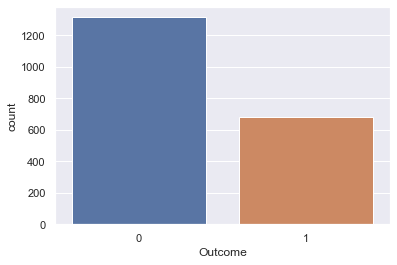

In [9]:
import seaborn as sns
sns.set()
sns.countplot(df["Outcome"])
plt.show()

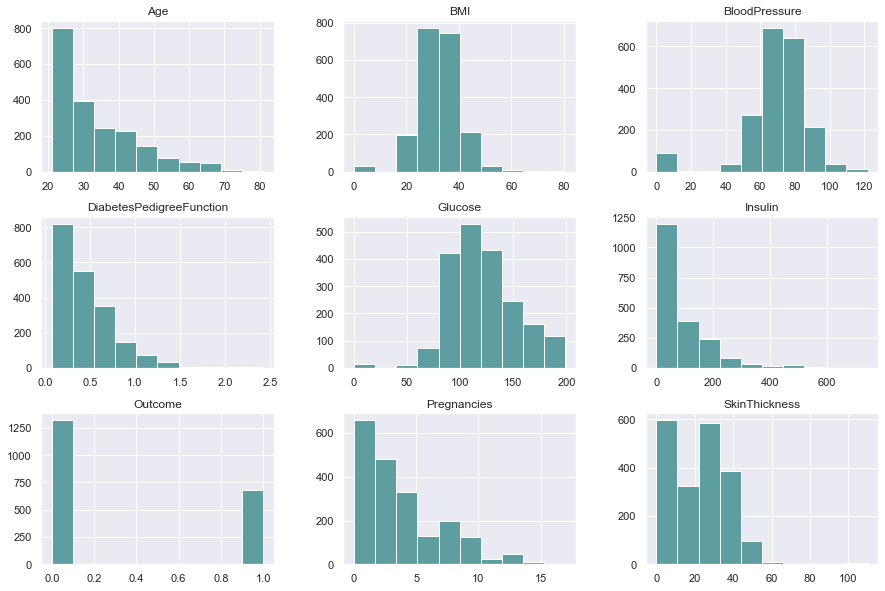

In [10]:
#Histogram
df.hist(figsize = (15,10), color = "#5F9EA0")
plt.show() 

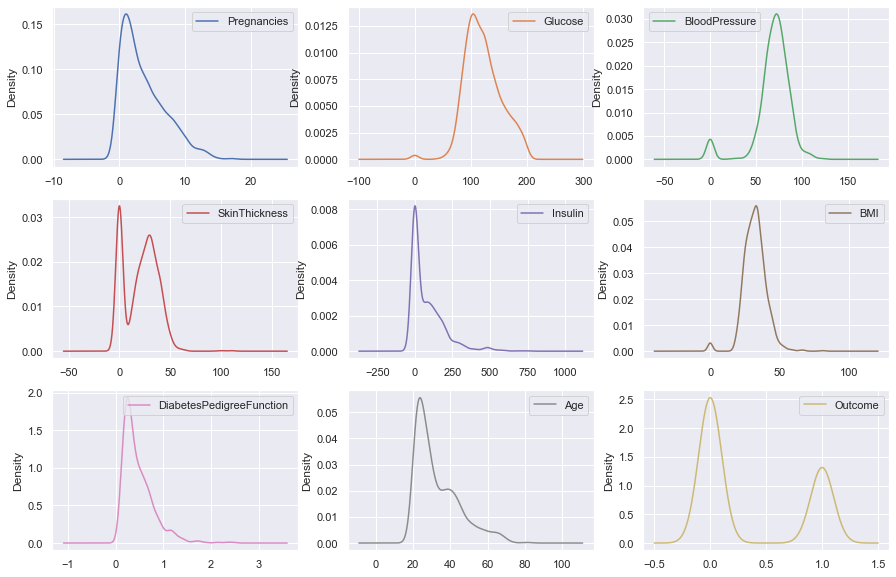

In [11]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False , figsize =(15,10))
plt.show()

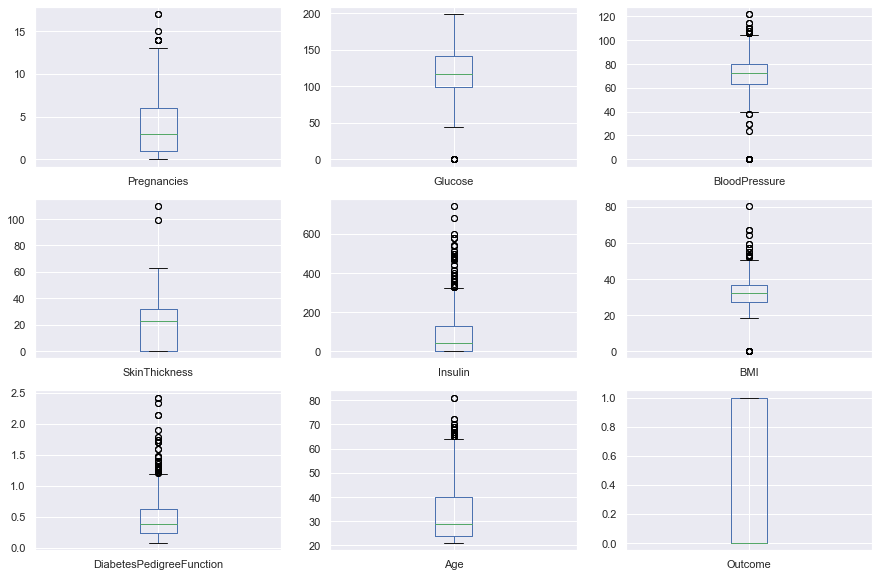

In [12]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(15,10))
plt.show()

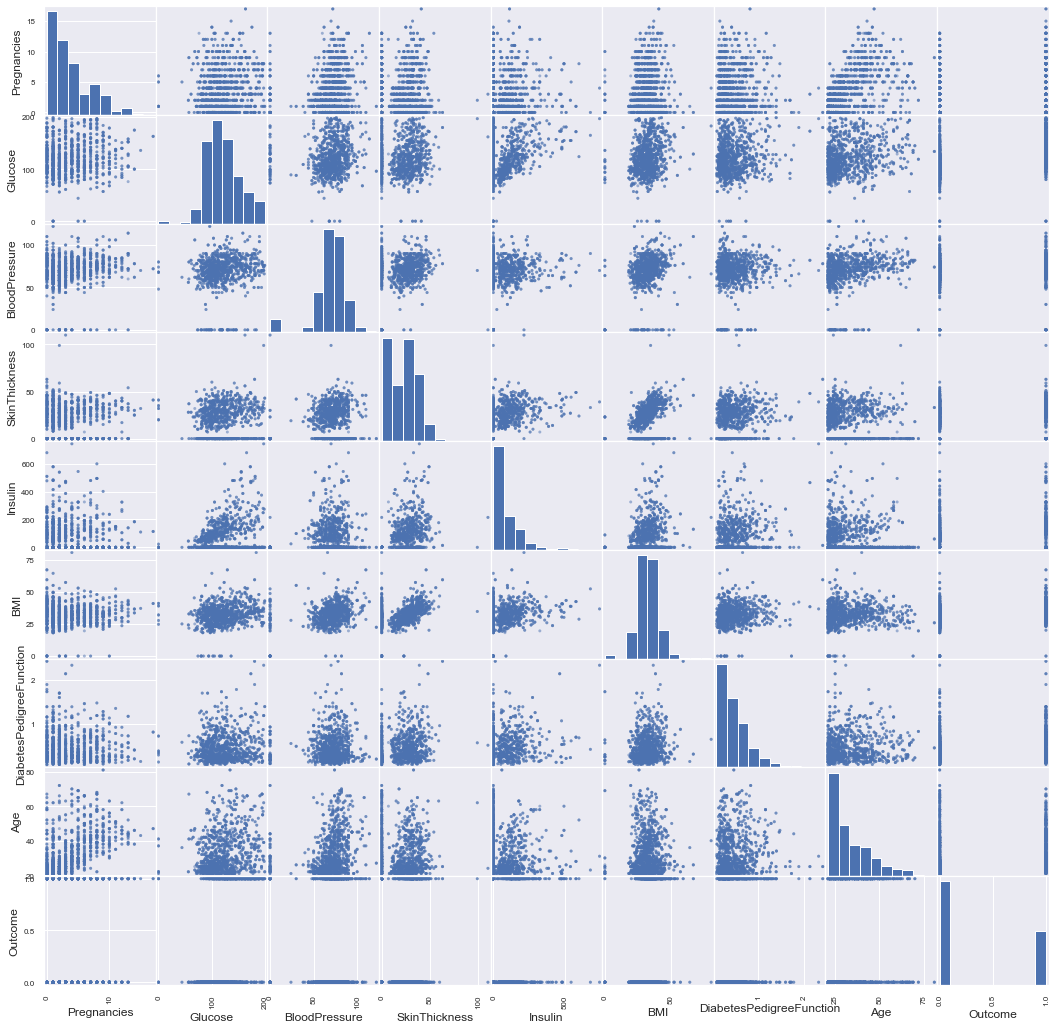

In [13]:
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

scatter_matrix(df ,figsize = (18,18))
pyplot.show()

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=20)

In [17]:
sc = StandardScaler()

In [18]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)
predict = regressor.predict(x_test)

In [21]:
accuracy_score(y_test,predict)

0.756

In [22]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(x_train,y_train)
predict = gn.predict(x_test)
accuracy_score(y_test,predict)

0.752

In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predict = svc.predict(x_test)
accuracy_score(y_test,predict)

0.808

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=100,n_jobs=2)
classifier.fit(x_train,y_train)
predict = classifier.predict(x_test)
accuracy_score(y_test,predict)

0.75

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_features=0.4, n_estimators=40, criterion="entropy", random_state=42)
classifier.fit(x_train,y_train)
predict = classifier.predict(x_test)
accuracy_score(y_test,predict)

0.97

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predict = classifier.predict(x_test)
accuracy_score(y_test,predict)

0.98

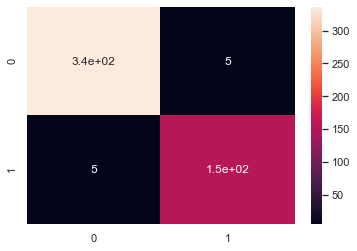

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

sns.set()
sns.heatmap(confusion_matrix(y_test, predict), annot =True)
plt.show()

In [28]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       341
           1       0.97      0.97      0.97       159

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [29]:
# print Roc_auc_score
from sklearn.metrics import roc_auc_score,roc_curve
print(roc_auc_score(y_test, predict))

0.9769453512606282


In [30]:
import pickle

filename = 'diabetes_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [31]:
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [32]:
import joblib
joblib.dump(classifier,r"diabetes_model1.pkl")

['diabetes_model1.pkl']

The Final Accuracy for Diabetes Classification Is 98%.

In [ ]:
df['DataFrame Column'] = df['DataFrame Column'].astype(float)

import pandas as pd

data = {'Product': ['ABC','XYZ'],
          'Price': ['250','270']
        }

df = pd.DataFrame(data)
print (df)
print (df.dtypes)